<a href="https://colab.research.google.com/github/pascalfriederich/programming_exercises/blob/main/exercise04_lock_in_amp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft

In [36]:
timestep = 1e-4
max_time = 5.0
num_steps = int(round(max_time/timestep))
times = np.linspace(0, max_time, num_steps)

frequency_ref = 50.0
# make a sine wave with frequecy "frequency_ref"
signal_ref = None # Todo

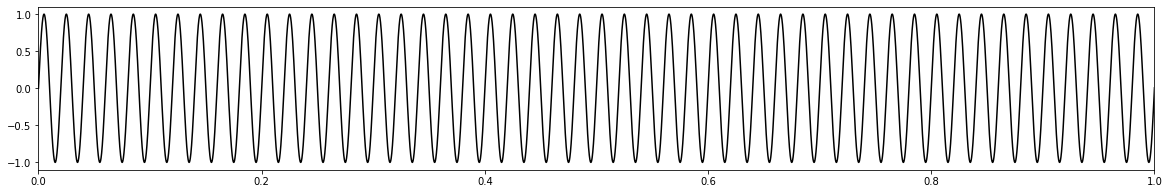

In [37]:
plt.figure(figsize = (20, 3))
# plot the signal_ref as a function of time, and show time interval 0 to 1
plt.show()

In [38]:
# Fourier transform functions
signal_ref_spectrum = rfft(signal_ref)
frequencies = fftfreq(signal_ref.size, d=times[1]-times[0])/2.0
order = np.argsort(frequencies)

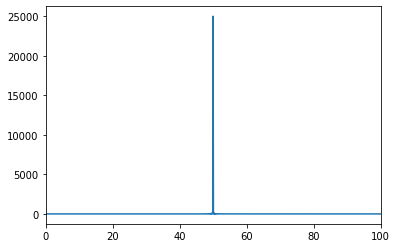

In [39]:
max_freq_to_plot = 100.0

# plot the "signal_ref_spectrum" over the "frequencies" with "order", from -10 to "max_freq_to_plot"

In [72]:
phase = 0.2*np.pi
noise_level = 20.0
# make a sine wave with frequecy "frequency_ref" and phase shift "phase"
signal_new = None # Todo
# make a list of noise values of the same size as the noise signal, multiplied with "noise_level"
noise = None # Todo
signal_noise = signal_new + noise

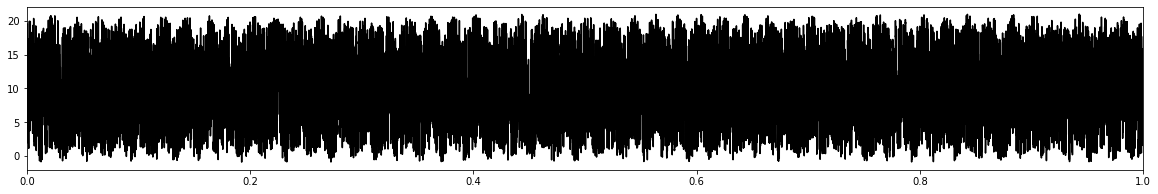

In [73]:
# plot the noisy signal over time, again from 0 to 1

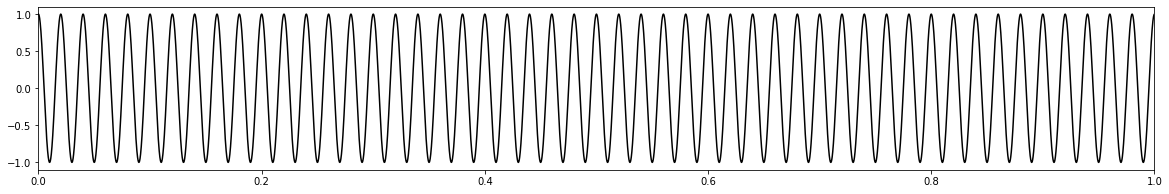

In [74]:
# Lock in amplifier

# make a new reference signal, shifted by pi/2 compared to the first reference signal
signal_ref_shifted = None # Todo

# plot it again
plt.figure(figsize = (20, 3))
# Todo
plt.show()

30000


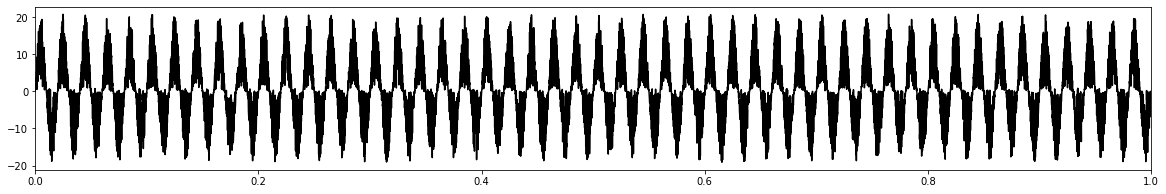

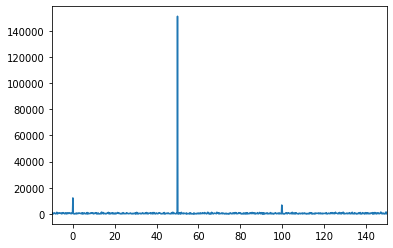

In [75]:
integration_time = 3.0
n_steps_to_average = int(round(integration_time / timestep))
print(n_steps_to_average)
signal_multiplied1 = signal_ref[:n_steps_to_average] * signal_noise[:n_steps_to_average]
signal_multiplied2 = signal_ref_shifted[:n_steps_to_average] * signal_noise[:n_steps_to_average]

signal_multiplied1_spectrum = rfft(signal_multiplied1)
frequencies = fftfreq(signal_multiplied1.size, d=times[1]-times[0])/2.0
order = np.argsort(frequencies)

# multiplied signal plot
plt.figure(figsize = (20, 3))
plt.plot(times[:n_steps_to_average], signal_multiplied1, "k-")
plt.xlim([0,1])
plt.show()


# frequency spectrum plot
max_freq_to_plot = 150.0

plt.figure()
plt.plot(frequencies[order], np.abs(signal_multiplied1_spectrum)[order])
plt.xlim([-10, max_freq_to_plot])
plt.show()


In [76]:
lengths = np.linspace(0.01, 5.0, 1000)
signals_mean1 = []
signals_mean2 = []
thetas = []
for idx, l in enumerate(lengths):
    n_steps_to_average = int(round(l / 1e-4))
    signal_multiplied1 = signal_ref[:n_steps_to_average] * signal_noise[:n_steps_to_average]
    signal_multiplied_mean1 = 1/float(n_steps_to_average)*np.sum(signal_multiplied1)
    signals_mean1.append(signal_multiplied_mean1)
    
    signal_multiplied2 = signal_ref_shifted[:n_steps_to_average] * signal_noise[:n_steps_to_average]
    signal_multiplied_mean2 = 1/float(n_steps_to_average)*np.sum(signal_multiplied2)
    signals_mean2.append(signal_multiplied_mean2)
    
    theta = np.arctan2(np.mean(signal_multiplied_mean2), np.mean(signal_multiplied_mean1))
    thetas.append(theta/np.pi)

print("Phase from lock-amplifier: %.2f pi"%(np.mean(thetas[-20:])))

Phase from lock-amplifier: 0.20 pi


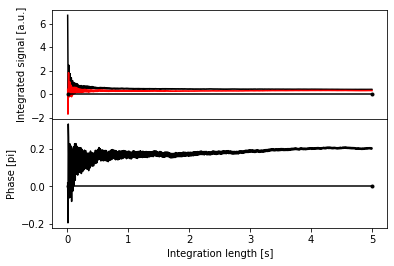

In [77]:
fig, axes = plt.subplots(2,1, sharex=True)
axes[0].plot(lengths, signals_mean1, "k-")
axes[0].plot(lengths, signals_mean2, "r-")
axes[0].plot([lengths[0], lengths[-1]], [0.0, 0.0], "k.-")
axes[1].plot(lengths, thetas, "k-")
axes[1].plot([lengths[0], lengths[-1]], [0.0, 0.0], "k.-")
axes[0].set_xlabel("")
axes[1].set_xlabel("Integration length [s]")
axes[0].set_ylabel("Integrated signal [a.u.]")
axes[1].set_ylabel("Phase [pi]")
plt.subplots_adjust(hspace=0)
plt.show()